In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

In [2]:
df = pd.read_csv("imbd_sentiments.csv")
df.head()

,Unnamed: 0,Reviews,Sentiments
0,0,? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all,1
1,1,? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then,0
2,2,? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life,0
3,3,? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our protagonist introduces himself to us and also introduces the story that stretches back through generations it produces stories within stories stories that evoke the ? wonder of scotland its rugged mountains ? 

In [3]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [47]:
## shape of the dataset
df.shape

(50000, 2)

In [48]:
## checking for null values
df.isnull().sum()

Reviews       0
Sentiments    0
dtype: int64

In [49]:
## information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Reviews     50000 non-null  object
 1   Sentiments  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [6]:
## collecting all the reivies in a single frame
reviews = [str(x) for x in df['Reviews']]

In [7]:
## collecting all the words in a single frame/ splitting each of the words
words = [word for sentence in reviews for word in sentence.split()]

In [8]:
## collecting the vocabulary 
vocabulary = set(words)

In [9]:
print(f'Number of Reviews/Sentences ----> {len(reviews)}')
print(f'Number of words in corpus ----> {len(words)}')
print(f'Number of words in vocabulary ----> {len(set(words))}')

Number of Reviews/Sentences ----> 50000
Number of words in corpus ----> 11737770
Number of words in vocabulary ----> 9996


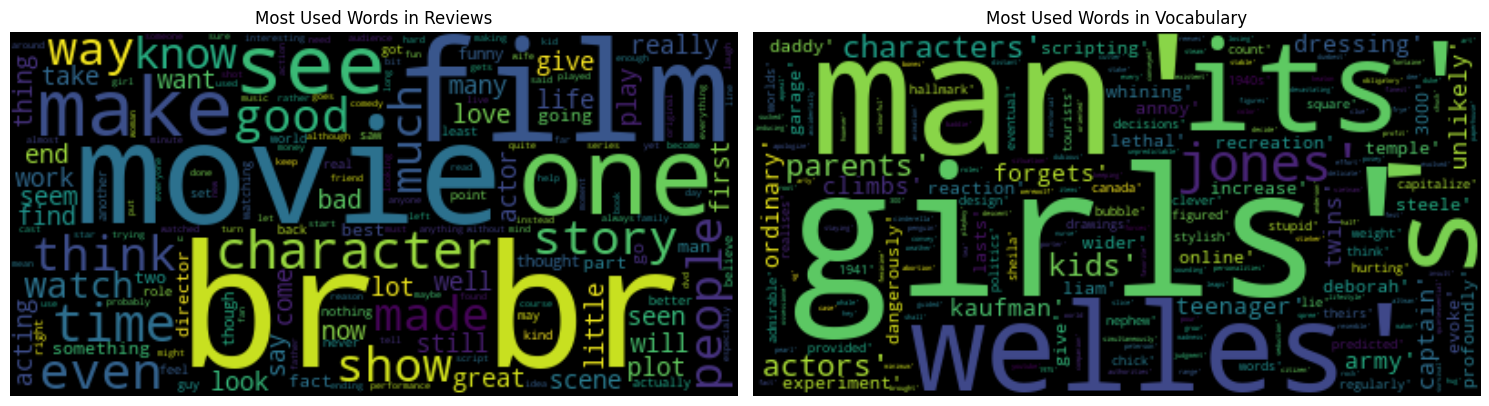

In [13]:
from wordcloud import WordCloud
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Most Used Words in Reviews")
axes[0].imshow(WordCloud().generate(str(reviews)), interpolation="bilinear")
axes[0].axis("off")
axes[1].set_title("Most Used Words in Vocabulary")
axes[1].imshow(WordCloud().generate(str(vocabulary)), interpolation="bilinear")
axes[1].axis("off")
plt.tight_layout()
plt.show()

#### We can see that there is an influence of Hyper-Text-Markup-Language while extracting the data from IMDB Website and it needs to be cleaned..

In [14]:
## remove the unwanted expressions other than A-Z, a-z and 1-9
df["Reviews"] = df["Reviews"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", str(x)).strip())

## also remove "br" from reviews : stand-alone word => "br"
df["Reviews"] = df["Reviews"].apply(lambda x: re.sub(r"\bbr\b", "", str(x)).strip())

In [16]:
df.head(2)

,Reviews,Sentiments
0,this film was just brilliant casting location scenery story direction everyones really suited the part they played and you could just imagine being there robert is an amazing actor and now the same being director father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also to the two little boys that played the of norman and paul they were just brilliant children are often left out of the list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done dont you think the whole story was so lovely because it was true and was someones life after all that was shared with us all,1
1,big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and ive seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is its just so damn terribly written the clothes are sickening and funny in equal the hair is big lots of boobs men wear those cut shirts that show off their sickening that men actually wore them and the music is just trash that plays over and over again in almost every scene there is trashy music boobs and taking away bodies and the gym still doesnt close for all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80s and have a good old laugh at how bad everything was back then,0


#### Let's recheck again

In [17]:
## list of reviews
reviews = [str(x) for x in df['Reviews']]
## list of words
words = [word for sentence in reviews for word in sentence.split()]
## set of vocabluary
vocabulary = set(words)
print(f'Number of Reviews/Sentences ----> {len(reviews)}')
print(f'Number of words in corpus ----> {len(words)}')
print(f'Number of words in vocabulary ----> {len(set(words))}')

Number of Reviews/Sentences ----> 50000
Number of words in corpus ----> 10842909
Number of words in vocabulary ----> 9900


### Differences
    Corpus     ---> 894861
    Vocabulary ---> 96

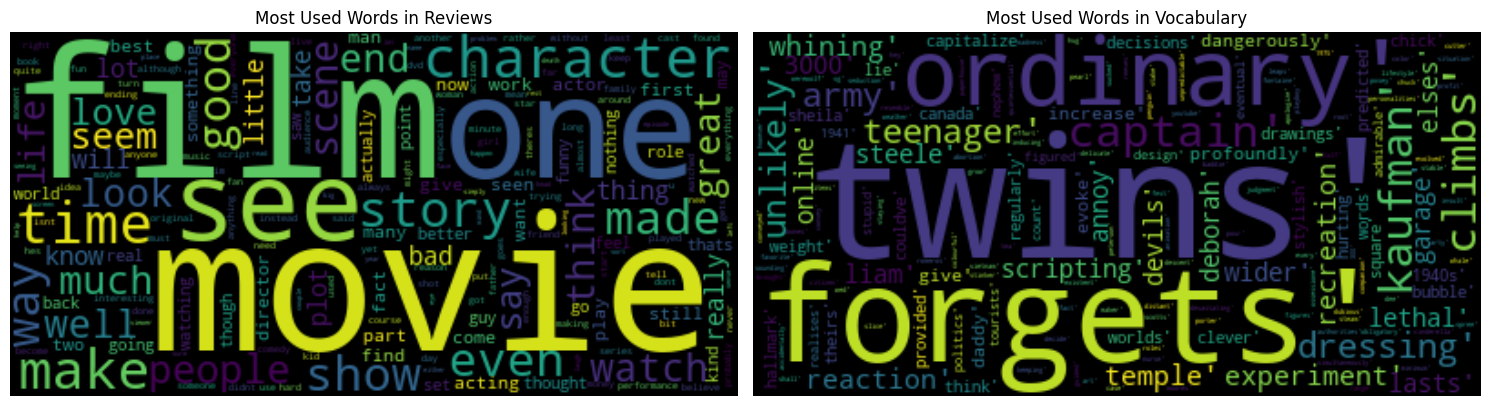

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Most Used Words in Reviews")
axes[0].imshow(WordCloud().generate(str(reviews)), interpolation="bilinear")
axes[0].axis("off")
axes[1].set_title("Most Used Words in Vocabulary")
axes[1].imshow(WordCloud().generate(str(vocabulary)), interpolation="bilinear")
axes[1].axis("off")
plt.tight_layout()
plt.show()

#### Now, this make a good WordCloud

In [21]:
## let's check for word counts in reviews
from collections import Counter
## splitting the sentences into words
words = [word for sentence in reviews for word in sentence.split()]
word_couts = Counter(words)

In [26]:
word_counts_sorted = dict(sorted(word_couts.items(), key=lambda item: item[1], reverse=True))

In [30]:
word_counts_sorted_df = pd.DataFrame(word_counts_sorted.items(), columns = ["words", "counts"])
word_counts_sorted_df.shape

(9900, 2)

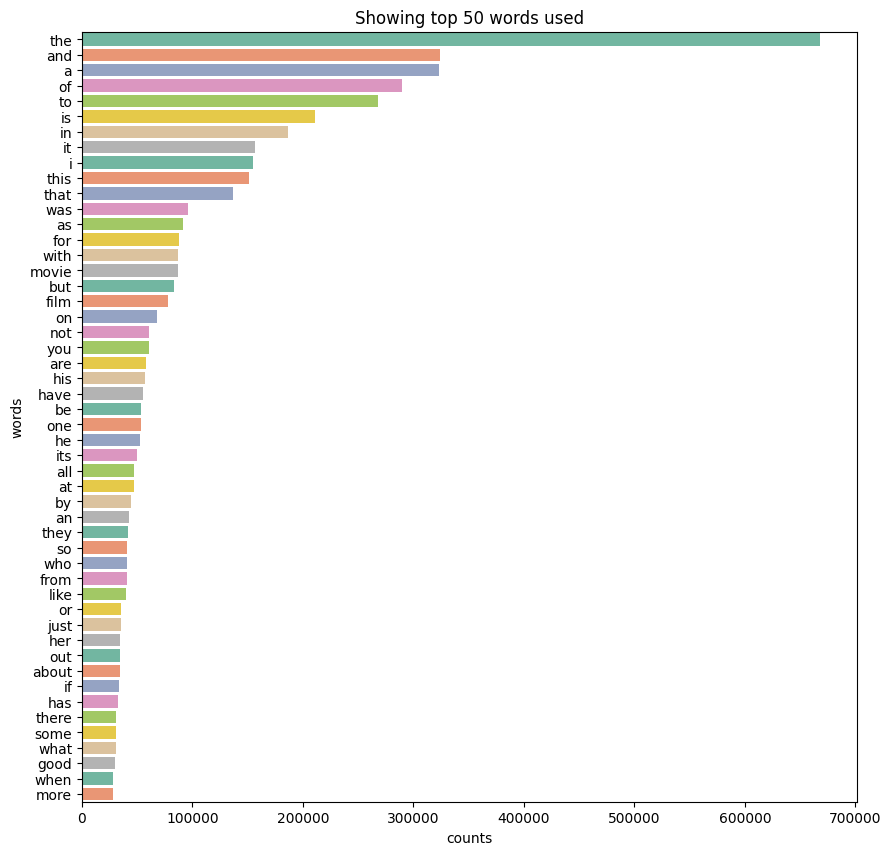

In [40]:
## visualizing top 50 words with number of counts
top_50_words = word_counts_sorted_df.head(50)
plt.figure(figsize=(10,10))
plt.title("Showing top 50 words used")
sns.barplot(data=top_50_words, y="words", x="counts", palette="Set2")
plt.show()

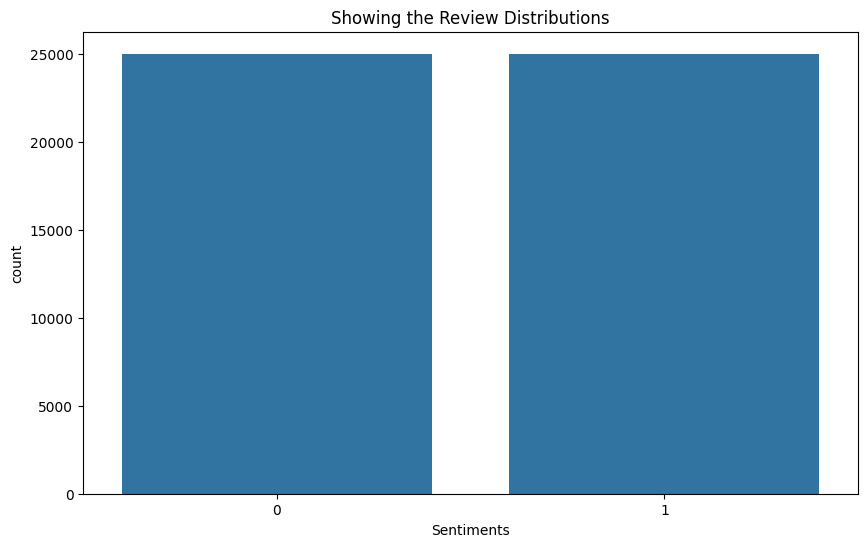

In [43]:
## showing of reviews distribution
plt.figure(figsize=(10,6))
plt.title("Showing the Review Distributions")
sns.countplot(data=df, x='Sentiments')
plt.show()

#### We have a balanced dataset

In [45]:
## saving the cleaned dataset into a csv file
df.to_csv("cleaned_sentiment_data.csv")
print("Saved to CSV")

Saved to CSV
